<h1><center><u> Device Configuration </u></h1>

In [1]:
import sys, os, time
import platform as plf

mem_bytes = os.sysconf('SC_PAGE_SIZE') * os.sysconf('SC_PHYS_PAGES')
mem_gib = mem_bytes/(1024.**3)

print('System Configuration: {}'.format(plf.platform())) #os.uname()
print('System RAM: {} GB'.format(round(mem_gib,2)))
print('Python Version: {}'.format(sys.version))
print('Current Working Directory: {}'.format(os.getcwd()))

## Getting and setting the current directory as working directory
# os.chdir(os.getcwd())

System Configuration: Linux-4.15.0-46-generic-x86_64-with-Ubuntu-18.04-bionic
System RAM: 15.57 GB
Python Version: 3.6.5 (default, Apr  1 2018, 05:46:30) 
[GCC 7.3.0]
Current Working Directory: /home/mohit/Documents/MyGits/MiniProjects/PredictProductSale


<h1><left>Roadmap</h1>  

1. Understanding the problem & dataset  

2. Preprocessing the data  
    - Data Cleaning (Missing data)  
    - Outlier Removal  
    - Normalization / Standardization  
    - Dummy Variable Creation  

3. Feature Engineering  
    - Feature Selection  
    - Feature Transformation  
    - Variable Interaction  
    - Feature Creation  
4. Selecting Modeling Algorithm  

5. Parameter Tuning through CrossValidation  

6. Building the Model  

7. Checking the Results  


Additional steps can include  

8. Building varied kind of model and Ensembling  

9. Performing solid local Validation and hyper parameter tuning  

Raw Data with complex relation structure --> Preprocessing --> Feature Engineering --> Model Selection --> Parameter Tuning --> Model Evaluation

<h1><center><u> Loading Libraries and Data </u></h1>

In [47]:
## Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from lib import datasetPrimAnalysis, ScalingDF, plotFeatureAndProperty, Plot_Confusion_Matrix

In [26]:
## Loading Data

# Train Data
df = pd.read_csv('ClassificationProblem1.txt', delimiter='\t')
print('DataFrame shape is {}'.format(df.shape))
display(df.head())

# Submission Data
sub_df = pd.read_csv('Classification1Test.txt', delimiter='\t')
print('\nDataFrame shape is {}'.format(sub_df.shape))
display(sub_df.head())

DataFrame shape is (101180, 24)


,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F14,F15,F16,F17,F18,F19,F20,F21,F22,C
0,1,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,...,-3433637453,10/4/1986,9/6/1992,2,1,706,305,1,2,0
1,2,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,...,609277486,2/24/1979,1/5/1983,1,1,423,206,18,7,1
2,3,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,...,-8977995005,1/12/1989,11/22/1986,2,1,703,315,1,4,0
3,4,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,...,4868760308,2/18/1982,6/10/1992,1,1,122,304,15,1,0
4,5,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,...,9757408267,4/10/1987,10/19/1985,1,1,486,240,1,1,0



DataFrame shape is (19913, 23)


,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22
0,T30234341,0.654765,0.812009,0.603190,0.391039,-5220,4825,-1784,7447,-7147,...,8074343777,5553595074,9/17/1996,8/18/1990,1,1,436,478,1,1
1,T30234342,0.694636,0.690568,0.473460,0.259760,-618,-5018,2012,9259,9267,...,-5556861821,2216284070,11/7/1985,4/11/1990,1,1,138,56,10,4
2,T30234343,0.203759,0.323301,0.492294,0.011448,-8778,6141,6965,3774,4303,...,-2121815725,-315409510,7/9/1984,5/4/1997,1,1,117,323,10,1
3,T30234344,0.319627,0.286247,0.906197,0.093840,-7929,4471,7715,9543,335,...,1389754605,-3360224957,6/3/1987,7/1/1988,1,1,115,149,16,21
4,T30234345,0.236003,0.782784,0.285689,0.383585,-3296,4564,-1580,-8559,-27,...,3653338555,7604838279,7/17/1984,12/3/1993,1,1,527,281,3,1


#### Discussion

Information in column name "Index" is quite different in both the dataframe, though it's of no concern as Index column won't be playing any role as predictor here. 

#todo# discuss <todo>

<h1><center><u> Data Preprocessing </u></h1>

### Tasks performed in this section include
- Datatype mauplation
- Handling Missing Data
- Handling Outlier 
- data scaling
- Perform Exploratory Data Analysis

In [27]:
## Generating Feature Understanding

## datetime based feature
#'F15' & 'F16' are time based
feat_dt = ['F15', 'F16']
for f in feat_dt: df[f] = pd.to_datetime(df[f],format='%m/%d/%Y')

## Categorical Features
# 'Index' has '101180' unique values which is same as the length of df
feat_str = ['Index']

# F5, F6, F7, F8, F9 each has approx 19.8k unique values
feat_str += ['F5', 'F6', 'F7', 'F8', 'F9']

# F17 & F18 each has 5 unique values 
feat_str += ['F17', 'F18']

# F19 & F20 each has 646 unique values each 
feat_str += ['F19', 'F20']

# F21 & F22 each has 21 unique values each 
feat_str += ['F21', 'F22']

# C has two unique value
feat_str += ['C']

# Converting feature datatype to Object
for f in feat_str: df[f] = df[f].astype(str)

df_info = datasetPrimAnalysis(df)

Overall dataset shape : (101180, 24)
____________| Number of feature/s which are Time based : 2 |____________


,IsNullSum,dtypes,IsNaSum,count,unique,top,freq,first,last,%Missing
F15,0,datetime64[ns],0,101180,8031,1985-03-13,46,1970-06-01,2005-01-23,0.0
F16,0,datetime64[ns],0,101180,6300,1991-01-13,55,1977-11-15,2005-03-04,0.0


____________| Number of feature/s which are Qualitative : 13 |____________


,IsNullSum,dtypes,IsNaSum,count,unique,top,freq,CategoriesName,%Missing
Index,0,object,0,101180,101180,36535,1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0.0
F5,0,object,0,101180,19876,2981,17,"[7934, -8238, 8540, -7772, 1571, -6554, -9455,...",0.0
F6,0,object,0,101180,19862,4490,17,"[-6970, 1219, 5266, -383, -8039, 8770, -9937, ...",0.0
F7,0,object,0,101180,19865,-4464,18,"[-5714, 1663, -9377, 9681, -7961, 1065, 4079, ...",0.0
F8,0,object,0,101180,19866,3415,16,"[9982, 1287, -3504, -8661, -2385, -9720, 8178,...",0.0
F9,0,object,0,101180,19887,4884,15,"[-5697, -3658, -4511, 3474, 4407, 5801, -663, ...",0.0
F17,0,object,0,101180,5,1,81320,"[2, 1, 4, 6, 3]",0.0
F18,0,object,0,101180,5,1,81432,"[1, 2, 4, 6, 3]",0.0
F19,0,object,0,101180,646,901,2139,"[706, 423, 703, 122, 486, 806, 448, 187, 701, ...",0.0
F20,0,object,0,101180,646,901,2029,"[305, 206, 315, 304, 240, 157, 702, 123, 34, 7...",0.0


____________| Number of feature/s which are Quantitative : 9 |____________


,IsNullSum,dtypes,IsNaSum,count,mean,std,min,25%,50%,75%,max,%Missing
F1,0,float64,0,101180.0,5.023477e-01,2.880579e-01,1.844080e-05,2.538188e-01,5.018017e-01,7.535983e-01,9.999856e-01,0.0
F2,0,float64,0,101180.0,5.014966e-01,2.890167e-01,3.709570e-06,2.511152e-01,5.010954e-01,7.524044e-01,9.999898e-01,0.0
F3,0,float64,0,101180.0,4.998863e-01,2.888748e-01,1.758830e-06,2.488185e-01,4.998198e-01,7.502808e-01,9.999853e-01,0.0
F4,0,float64,0,101180.0,4.998388e-01,2.887291e-01,5.640770e-06,2.505012e-01,5.013866e-01,7.488031e-01,9.999773e-01,0.0
F10,0,int64,0,101180.0,1.869749e+07,5.769064e+09,-9.999816e+09,-4.966961e+09,4.346691e+07,5.019440e+09,9.999497e+09,0.0
F11,0,int64,0,101180.0,-7.052456e+06,5.779111e+09,-9.999804e+09,-4.994511e+09,-5.477172e+07,4.994296e+09,9.999897e+09,0.0
F12,0,int64,0,101180.0,6.921685e+06,5.771750e+09,-9.999754e+09,-4.991278e+09,4.277384e+07,5.008238e+09,9.999555e+09,0.0
F13,0,int64,0,101180.0,1.127538e+07,5.786659e+09,-9.999852e+09,-5.027003e+09,9.416236e+06,5.032947e+09,9.999951e+09,0.0
F14,0,int64,0,101180.0,-5.198163e+07,5.782358e+09,-9.999767e+09,-5.070403e+09,-8.816174e+07,4.947133e+09,9.999997e+09,0.0


<h3><left> Feature Processing </h3>

In [28]:
## Feature Engineering & Manupulation
'''
Domain knowledge is not provided with this problem statement and we are not sure of feature defination. 
Hence Feature manuplation and engineering is a challenge. 
Making use of feature which are time series based is of particular chalenges, as there is not information 
that can be considered for the forecasting.... <todo>  no trend to be generated, it's just timestamps ...

'''

## Converting Information Type
# Handling  Time Based Feature
df['F15_d'] = [ ele.timestamp() / (60*60*24) for ele  in df['F15'] ] ## days since reference time 1Jan1970
df['F16_d'] = [ ele.timestamp() / (60*60*24) for ele  in df['F16'] ] 

# Checking this new Feature (Difference o these two dates)
# df['Diff_F16_15_days'] = [ (df['F16'][i] - df['F15'][i]).days for i in range(len(df)) ]
# df['Diff_F16_15_days'] = [ df['F16'][i] - df['F15'][i] for i in range(len(df)) ]


## Converting DataTypes
# To Numeric
feat_num = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12',\
            'F13','F14','F15_d','F16_d','F19','F20','F21','F22']
for f in feat_num: df[f] = df[f].astype(float)

# To Object
feat_str = ['Index','F17','F18','C']
for f in feat_str: df[f] = df[f].astype(str)


## Dropping some certain features
df.drop(columns=['F15', 'F16'], inplace=True) #'Index' is valuable for sub_df hence won't be dropped at this stage


df_info = datasetPrimAnalysis(df, msg=False)

In [101]:
df.drop(columns=['Index'], inplace=True) ## since thiss is unnecessary in this dataframe

<h3><left> Handling Missing Data </h3>

,column_name,missing_count


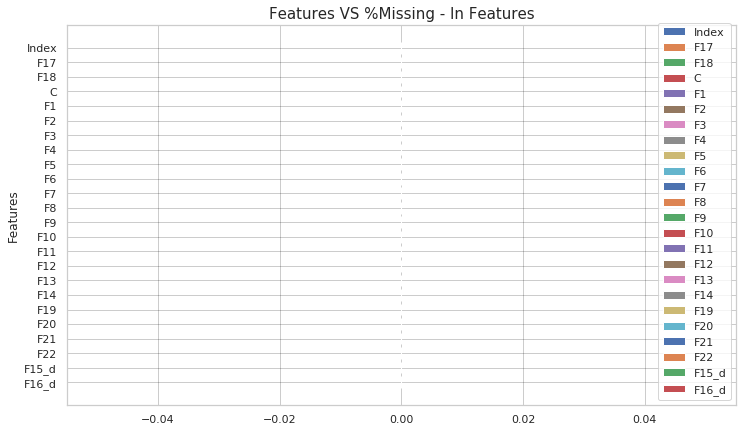

' \nThere is no column having any missing value. Hence, Nothing to do here \n'

In [100]:
## Handling Missing Obsservation
missing_data = df.isnull().sum(axis=0).reset_index()
missing_data.columns = ['column_name', 'missing_count']
missing_data = missing_data.loc[missing_data['missing_count']>0]
missing_data = missing_data.sort_values(by='missing_count')
display(missing_data)

tempDF = pd.concat([df_info['Caterorical'], df_info['Numerical']], sort=False)
featName = list(tempDF.index)
missingPct = list(tempDF['%Missing'])
plotFeatureAndProperty(featName, missingPct, featName, tit='%Missing')

#### Disccussion
There is no column having any missing value. Hence, Nothing to do here 


<h3><left> Feature Scaling </h3>

In [ ]:
def generatePlots(df_info):
    ## way 1 -- using return dictionary from scaler
    # featName = list(iniDescStats_dict.keys())
    # mea = [ iniDescStats_dict[f]['Mean'] for f in feat ]
    ## way 2 -- using df_info from primary analysis
    featName = list(df_info['Numerical'].index)
    mea = list(df_info['Numerical']['mean'] )
    plotFeatureAndProperty(featName, mea, featName, tit='Mean')
    med = list(df_info['Numerical']['50%'])
    plotFeatureAndProperty(featName, med, featName, tit='Median')    
    std = list(df_info['Numerical']['std'] )
    plotFeatureAndProperty(featName, std, featName, tit='Standard Deviation')

## Standard Scaling
df_info = datasetPrimAnalysis(df, msg=False)

scaler = ScalingDF(df.loc[:, df_info['Numerical'].index ])
df.loc[:, df_info['Numerical'].index ], iniDescStats_dict = scaler.standardization()
# finDescStats_dict = scaler.generateNewFeaturesDescriptiveStats()

# again checking the structure
df_info_fin = datasetPrimAnalysis(df)



NameError: name 'df_info_fin' is not defined

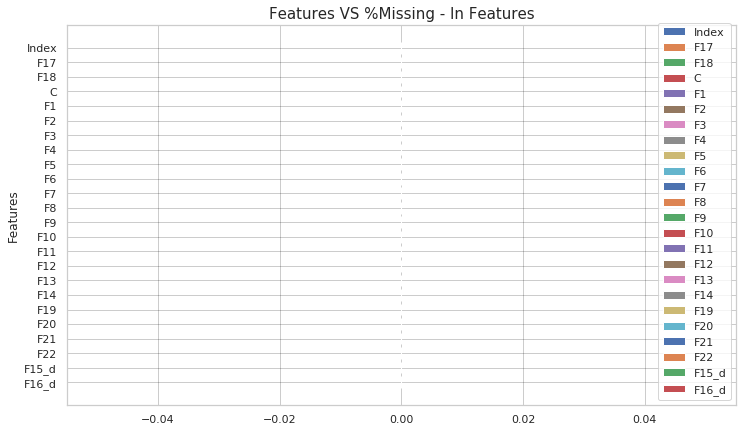

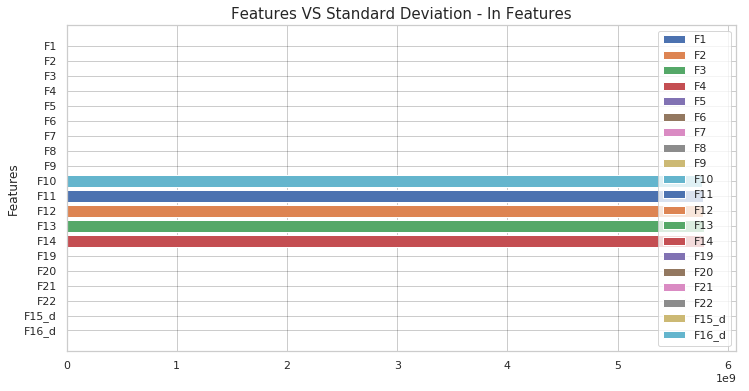

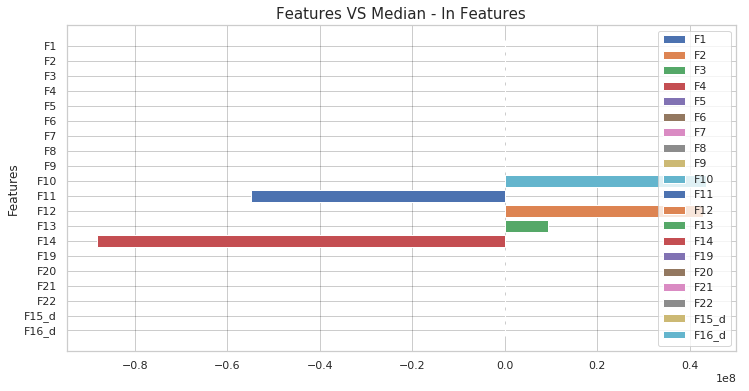

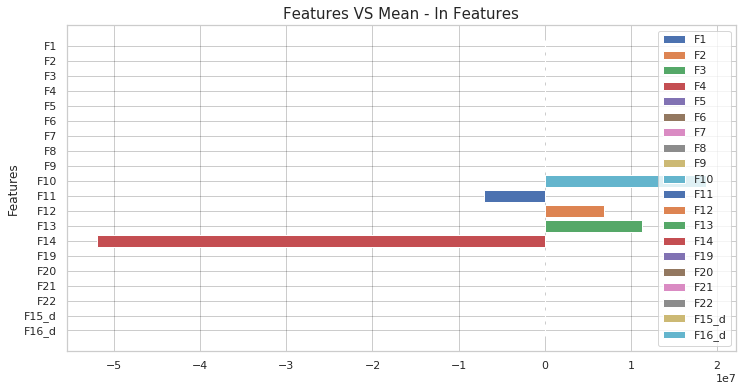

In [97]:


featName = list(df_info['Numerical'].index)


featName = list(df_info['Numerical'].index)




In [ ]:



## Analyzing Outliers
def outlier_zScore_series(ser, threshold = 3):
    ser_mean, ser_std = ser.mean(), ser.std()
    ser = list(ser)
    if ser_std != 0:
        #return [ True if abs((ele - ser_mean)/ser_std) > threshold else False for ele in ser ] 
        return [ i for i in range(len(ser)) if abs((ser[i] - ser_mean)/ser_std) > threshold ] 
    else:
        raise Exception('Dividing by zero')

outlier_index_list = []
for feat in df_info['Numerical'].index:
    print('Checking for outlier in the feature "{}"'.format(feat))
    [ outlier_index_list.append(ele) for ele in outlier_zScore_series(df[feat]) ]
# print(outlier_index_list)

ind_dict = {} # will contain key = index & value = # of feature satisfying conditions
for ke in outlier_index_list:
    if ke in ind_dict.keys():
        ind_dict[ke] += 1
    else:
        ind_dict[ke] = 1

print('Indexes that have been marked as outlier and by how many features', ind_dict)
# Removing index which are marked as outlier by any features
index_to_drop = [ key for key in ind_dict.keys() if ind_dict[key] > 0 ] 
df.drop(index=index_to_drop, inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
# Apply PCA to the data.
import ast
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA, LatentDirichletAllocation, FastICA, TruncatedSVD


def PlotExplainedVar(Mod):
    fig = plt.figure(figsize=(15, 20))
    sns.set(style="whitegrid")
    # sns.set(style="darkgrid")
    # plt.subplot(211)
    yAxis = [ 'PCA_var_' + str(i) for i in range(len(Mod.explained_variance_)) ]
    xAxis = [ round(Mod.explained_variance_ratio_[i] / Mod.explained_variance_ratio_.sum() * 100, 2) for i in range(len(Mod.explained_variance_ratio_)) ]
    sns.barplot(xAxis, yAxis)
    ## Alternatively
    # plt.barh(yAxis, width=xAxis, align='center')
    # plt.gca().invert_yaxis()
    plt.grid(True, color='black', alpha=0.2)
    plt.title('Features VS % Variance Explained', fontsize=15)
    plt.xlabel('% Variance Explaind')
    plt.ylabel('Features')
    plt.show()

    fig = plt.figure(figsize=(17, 5))
    sns.set(style="whitegrid")
    # plt.subplot(212)
    Freq = [ Mod.explained_variance_ratio_[i] / Mod.explained_variance_ratio_.sum() * 100 for i in range(len(Mod.explained_variance_ratio_)) ] 
    CumulFreq = [ sum(Freq[0:i+1]) for i in range(len(Freq)) ] 
    # sns.barplot(CumulFreq, yAxis)
    ## Alternatively
    plt.bar(yAxis, height=CumulFreq, width=1, align='center')
    # plt.barh(yAxis, width=CumulFreq, align='center')
    # plt.gca().invert_yaxis()
    plt.grid(True, color='black', alpha=0.2)
    plt.title('Features VS % Cumulative Explained Variance', fontsize=15)
    plt.xlabel('% Variance Explaind')
    plt.ylabel('Features')
    plt.xticks(rotation=90)

    plt.show()

def DimensionTransf(AlgoToUse, AlgoConfig, DF):
    df = DF.copy()
    DimensionTransformModels_dict = {
        'PCA': {'Model': PCA(), 'DataTypeBoundation': 'Nil', 'fit': True, 'fit_transform': True, 'transform': True }, 
        'IncPCA': {'Model': IncrementalPCA(), 'DataTypeBoundation': 'Nil', 'fit': True, 'fit_transform': True, 'transform': True }, 
        'KerPCA': {'Model': KernelPCA(), 'DataTypeBoundation': 'Nil', 'fit': True, 'fit_transform': True, 'transform': True }, 
        'LDA': {'Model': LatentDirichletAllocation(), 'DataTypeBoundation': 'Normalized', 'fit': True, 'fit_transform': True, 'transform': True }, 
        'ICA': {'Model': FastICA(), 'DataTypeBoundation': 'Normalized', 'fit': True, 'fit_transform': True, 'transform': True },  
        'TrunSVD': {'Model': TruncatedSVD(), 'DataTypeBoundation': 'Nil', 'fit': True, 'fit_transform': True, 'transform': True }, 

        'MiniBatchSparsePCA': {}, # http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.MiniBatchSparsePCA.html#sklearn.decomposition.MiniBatchSparsePCA
        'SparsePCA': {}, # http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparsePCA.html#sklearn.decomposition.SparsePCA
        'DictionaryLearning': {}, # http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.DictionaryLearning.html#sklearn.decomposition.DictionaryLearning
        'MiniBatchDictionaryLearning': {}, # http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.MiniBatchDictionaryLearning.html#sklearn.decomposition.MiniBatchDictionaryLearning
        'FactorAnalysis': {}, # http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html#sklearn.decomposition.FactorAnalysis
        'NMF': {} # http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html#sklearn.decomposition.NMF
        }

    params =  ast.literal_eval(AlgoConfig) ##
    Model = DimensionTransformModels_dict[AlgoToUse]['Model']
    Model.set_params(**params)
    ModSpecDataPrep = DimensionTransformModels_dict[AlgoToUse]['DataTypeBoundation']
    print('Transforming Dimensions Using :', AlgoToUse)
    ## Training Model
    if(df is not None):
        print('Developing Model :: On provided Data')
        if(DimensionTransformModels_dict[AlgoToUse]['fit_transform'] == True):
            tempDF = pd.DataFrame(Model.fit_transform(df.loc[:, :]))
            tempDF.rename(columns=dict(zip(tempDF.columns, AlgoToUse + '_var_' + tempDF.columns.astype('str'))), inplace=True)
            # df_transf = df_transf.join(tempDF, rsuffix='_y')
            # Trainset_transformed.columns = Trainset_transformed.columns.astype(str)  # Column name being numeric
        elif((DimensionTransformModels_dict[AlgoToUse]['fit'] == True) & (DimensionTransformModels_dict[AlgoToUse]['transform'] == True)):
            Model.fit(df.loc[:, :])
            tempDF = pd.DataFrame(Model.transform(df.loc[:, :]))
            tempDF.rename(columns=dict(zip(tempDF.columns, AlgoToUse + '_var_' + tempDF.columns.astype('str'))), inplace=True)
            # df_transf = df_transf.join(tempDF, rsuffix='_y')
        else:
            print('Some Error is present')
    
    return tempDF, Model


AlgoToUse = 'PCA' ##
## Getting the Configuration for the Algorithm
AlgoConfig = '''{'n_components': None, 'copy': True, 'whiten': False, 'svd_solver': 'auto', 'tol':0.0, 'iterated_power':'auto', 'random_state':None }'''
## http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA
## (n_components=None, copy=True, whiten=False, svd_solver=’auto’, tol=0.0, iterated_power=’auto’, random_state=None)

azdiasPart1_DimTransf, Model = DimensionTransf(AlgoToUse, AlgoConfig, azdiasPart1_stand)
PlotExplainedVar(Model)



def VisualizeClusters(PlotDF, DimRedAlgo, ClusterAlgo, ax={'ax1': 0,'ax2': 1,'ax3': 2}, extra_color=False):
    # Plotting Static 3D Plot using the first three variables only
    ax1 = ax['ax1']  ## First axis to take   Data.iloc[:,2]
    ax2 = ax['ax2']  ## Second axis to take
    ax3 = ax['ax3']  ## Third axis to take
    
    IndextoStart = 0 
    
    fig = plt.figure(figsize=(20, 10))
    ax = fig.gca()
    
    Cluster = PlotDF.filter(like='Predict').iloc[:, 0].fillna(-999).astype(object)  ### converting to int so that if cluster_Predict result is in float
    # centers = kmeans.cluster_centers_[:,0:3
    try:
        if ClusterAlgo == 'MeanShift':
            extra_color = 'True'
        if extra_color in ['True', 'true', 'T', 't', 'Yes', 'yes', 'Y', 'y']:
            colors_list = list(colors._colors_full_map.values())
            color = colors_list
        else:
            color = [
             'b', 'y', 'm', 'r', 'g', 'c', 'aqua', 'sienna', 'lime', 'steelblue', 'hotpink', 'gold',
             'yellow1', 'wheat1', 'violetred1', 'turquoise1', 'tomato1',
             'thistle1', 'tan1', 'steelblue1', 'springgreen1', 'snow3', 'slategray2', 'slateblue2',
             'skyblue2', 'sienna1', 'sgilightblue', 'sgilightgray', 'sgiolivedrab', 'sgisalmon',
             'sgislateblue', 'sgiteal', 'sgigray32', 'sgibeet', 'seagreen2', 'salmon2', 'royalblue2',
             'rosybrown2', 'red1', 'raspberry', 'purple2', 'plum1', 'peachpuff1', 'palevioletred1',
             'paleturquoise2', 'palegreen1', 'orchid1', 'orangered1', 'orange1', 'olivedrab1', 'olive',
             'navajowhite1', 'mediumvioletred', 'mediumpurple1', 'maroon2', 'limegreen', 'lightsalmon4',
             'lightpink1', 'lightcoral', 'indianred1', 'green1', 'gold2', 'firebrick1', 'dodgerblue2',
             'deeppink1', 'deepskyblue1', 'darkseagreen1', 'darkorange1', 'darkolivegreen1', 'darkgreen',
             'darkgoldenrod2', 'crimson', 'chartreuse2', 'cadmiumorange', 'burntumber', 'brown2', 'blue2',
             'antiquewhite4', 'aquamarine4', 'banana', 'bisque4', 'k']

        print(PlotDF.filter(like = 'Predict').columns)
        plt.subplot(243)
        for clust in np.sort(Cluster.unique()).tolist():
            ys = PlotDF[PlotDF.filter(like='Predict').iloc[:, 0] == clust].loc[:, PlotDF.columns[IndextoStart + ax2]].values
            zs = PlotDF[PlotDF.filter(like='Predict').iloc[:, 0] == clust].loc[:, PlotDF.columns[IndextoStart + ax3]].values
            plt.scatter(ys, zs, c=color[np.sort(Cluster.unique()).tolist().index(clust)], marker='o', alpha=0.5)
        plt.grid(True, color='black', alpha=0.2)
        plt.title('YZ plane', fontsize=15)
        plt.xlabel('Y')
        plt.ylabel('Z')

        plt.subplot(244)
        for clust in np.sort(Cluster.unique()).tolist():
            xs = PlotDF[PlotDF.filter(like='Predict').iloc[:, 0] == clust].loc[:, PlotDF.columns[IndextoStart + ax1]].values
            zs = PlotDF[PlotDF.filter(like='Predict').iloc[:, 0] == clust].loc[:, PlotDF.columns[IndextoStart + ax3]].values
            plt.scatter(xs, zs, c=color[np.sort(Cluster.unique()).tolist().index(clust)], marker='o', alpha=0.5)
        plt.grid(True, color='black', alpha=0.2)
        plt.title('XZ plane', fontsize=15)
        plt.xlabel('X')
        plt.ylabel('Z')

        plt.subplot(248)
        for clust in np.sort(Cluster.unique()).tolist():
            xs = PlotDF[PlotDF.filter(like='Predict').iloc[:, 0] == clust].loc[:, PlotDF.columns[IndextoStart + ax1]].values
            ys = PlotDF[PlotDF.filter(like='Predict').iloc[:, 0] == clust].loc[:, PlotDF.columns[IndextoStart + ax2]].values
            plt.scatter(xs, ys, c=color[np.sort(Cluster.unique()).tolist().index(clust)], marker='o', alpha=0.5)
        plt.grid(True, color='black', alpha=0.2)
        plt.title('XY plane', fontsize=15)
        plt.xlabel('X')
        plt.ylabel('Y')

        ax = fig.add_subplot(121, projection='3d')
        for clust in np.sort(Cluster.unique()).tolist():
            xs = PlotDF[PlotDF.filter(like='Predict').iloc[:, 0] == clust].loc[:, PlotDF.columns[IndextoStart + ax1]].values
            ys = PlotDF[PlotDF.filter(like='Predict').iloc[:, 0] == clust].loc[:, PlotDF.columns[IndextoStart + ax2]].values
            zs = PlotDF[PlotDF.filter(like='Predict').iloc[:, 0] == clust].loc[:, PlotDF.columns[IndextoStart + ax3]].values
            ax.scatter(xs, ys, zs, zdir='z', c=color[np.sort(Cluster.unique()).tolist().index(clust)], alpha=0.7, marker='o', label='Cluster_' + str(clust))
        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')
        plt.title(('Visualization of Cluster on three dimensions,\n Developed by {model}.').format(model=DimRedAlgo + ClusterAlgo), fontsize=15)
        plt.legend(loc='lower right', frameon=True)
        plt.grid(True, color='black', alpha=0.2)

        plt.subplot(247)
        sns.countplot(x=Cluster, alpha=0.5)
        plt.title('Observations Count in each Clust')
        plt.tight_layout()
        plt.show()


        PlotDF_col = PlotDF.filter(like='Predict').iloc[:, 0].fillna(-999).astype(object).reset_index()
        ClustModelName = PlotDF.filter(like='Predict').columns[0] + 'ed Cluster Name'
        PlotDF_col.columns = ['# of Observations', ClustModelName]
        PlotDF_col = PlotDF_col.groupby(ClustModelName).aggregate('count').reset_index()
        PlotDF_col = PlotDF_col.set_index(PlotDF_col.index).T

        fig = plt.figure(figsize=(20, 2), dpi=150)# no visible frame
        ax = plt.subplot(111, frame_on=False)
        ax.xaxis.set_visible(False) # hide the x axis
        ax.yaxis.set_visible(False)
        table(ax, PlotDF_col, loc='center')
        plt.show()
    
    except Exception as e:
        print('Error :', str(e))
        print('Error in Plotting Graph. Total No. of Clusters that are present :', len(Cluster.unique()))
    

def ClusterDevelopment(ClustAlgo, ClustAlgo_ParamConfig, DF):
    df = DF.copy()
    ClustAlgo_params = ast.literal_eval(ClustAlgo_ParamConfig)
    
    ### Defining Models and their property
    ClusteringModels_dict = {
        'KMeans': {'ModelType': 'ClusterModelData', 'Model': KMeans(), 'DataTypeBoundation': 'Nil', 
                            'fit': True, 'fit_predict': True, 'predict': True, 'DecisionFunction': False}, 
        'MiniBatchKMeans': {'ModelType': 'ClusterModelData', 'Model': MiniBatchKMeans(), 'DataTypeBoundation': 'Nil', 
                             'fit': True, 'fit_predict': True, 'predict': True, 'DecisionFunction': False}, 
        'AffinityPropagation': {'ModelType': 'ClusterModelData', 'Model': AffinityPropagation(), 'DataTypeBoundation': 'Nil', 
                               'fit': True, 'fit_predict': True, 'predict': True, 'DecisionFunction': False}, 
        'MeanShift': {'ModelType': 'ClusterModelData', 'Model': MeanShift(), 'DataTypeBoundation': 'Nil', 
                        'fit': True, 'fit_predict': True, 'predict': True, 'DecisionFunction': False},
        'Birch': {'ModelType': 'ClusterModelData', 'Model': Birch(), 'DataTypeBoundation': 'Nil', 
                            'fit': True, 'fit_predict': True, 'predict': True, 'DecisionFunction': False}, 
        'SpectralClustering': {'ModelType': 'ClusterModelData', 'Model': SpectralClustering(), 'DataTypeBoundation': 'Nil', 
                             'fit': True, 'fit_predict': True, 'predict': False, 'DecisionFunction': False}, 
        'AgglomerativeClustering': {'ModelType': 'ClusterModelData', 'Model': AgglomerativeClustering(), 'DataTypeBoundation': 'Nil', 
                               'fit': True, 'fit_predict': True, 'predict': False, 'DecisionFunction': False}, 
        'DBSCAN': {'ModelType': 'ClusterModelData', 'Model': DBSCAN(), 'DataTypeBoundation': 'Nil', 
                        'fit': True, 'fit_predict': True, 'predict': False, 'DecisionFunction': False},
    }

    Model = ClusteringModels_dict[ClustAlgo]['Model']
    Model.set_params(**ClustAlgo_params)
    ModelSpecificDataPreparation = ClusteringModels_dict[ClustAlgo]['DataTypeBoundation']
    ModelType = ClusteringModels_dict[ClustAlgo]['ModelType']


    ## Training Model
    if(df is not None):
        print('Developing Model :: On provided Data')
        if(ClusteringModels_dict[ClustAlgo]['fit_predict'] == True):
            df[ClustAlgo + '_Predict'] = pd.DataFrame( Model.fit_predict(df) )  
        elif((ClusteringModels_dict[ClustAlgo]['fit'] == True) & (ClusteringModels_dict[ClustAlgo]['predict'] == True)):
            Model.fit(df) 
            df[ClustAlgo + '_Predict'] = pd.DataFrame(Model.predict(df)) 
        else:
            print('Some Error is present')

    return df

In [ ]:
##  Two Cluster

ClustAlgo = 'KMeans'
ClustAlgo_ParamConfig = '''{'n_clusters':2, 'init':'k-means++', 'n_init': 10, 'max_iter': 300, 'tol': 0.0001}'''
## (n_clusters=8, init=’k-means++’, n_init=10, max_iter=300, tol=0.0001, precompute_distances=’auto’, verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm=’auto’)
## algorithm : “auto”, “full” or “elkan”, default=”auto”
azdiasPart1_ClustPred2 = ClusterDevelopment(ClustAlgo, ClustAlgo_ParamConfig, azdiasPart1_DimTransf)

VisualizeClusters(azdiasPart1_ClustPred2, AlgoToUse, ClustAlgo)

In [ ]:
##  Four Cluster

ClustAlgo = 'KMeans'
ClustAlgo_ParamConfig = '''{'n_clusters':4, 'init':'k-means++', 'n_init': 10, 'max_iter': 300, 'tol': 0.0001}'''
## (n_clusters=8, init=’k-means++’, n_init=10, max_iter=300, tol=0.0001, precompute_distances=’auto’, verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm=’auto’)
## algorithm : “auto”, “full” or “elkan”, default=”auto”
azdiasPart1_ClustPred4 = ClusterDevelopment(ClustAlgo, ClustAlgo_ParamConfig, azdiasPart1_DimTransf)

VisualizeClusters(azdiasPart1_ClustPred4, AlgoToUse, ClustAlgo)

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(range(data.shape[0]), np.sort(data.isBotHits.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('isBotHits', fontsize=12)
plt.show()

In [ ]:
##  classs balancing
sns.countplot(x= df['C'])
plt.show()

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(figsize=(12, 6), nrows=2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
PCLB = sns.boxplot(train_DF['pre_clean_len_text'], ax=ax_box, color = 'blue')
PCLD = sns.distplot(train_DF['pre_clean_len_text'], ax=ax_hist, bins = 350, color = 'blue')
PCLB.set_title("Unclean Text Length")
PCLD.set(xlim=(0, 400))
ax_box.set(xlabel='')

f, (ax_box, ax_hist) = plt.subplots(figsize=(12, 6), nrows=2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
CLB = sns.boxplot(train_DF['clean_len_text'], ax=ax_box, color = 'red')
CLD = sns.distplot(train_DF['clean_len_text'], ax=ax_hist, bins = 150, color = 'red')
CLB.set_title("Clean Text Length")
CLD.set(xlim=(0, 400))
ax_box.set(xlabel='')

In [ ]:
var_x = df['F15']
sns.set_style("dark") # darkgrid, whitegrid, dark, white, ticks

# Cut the window in 2 parts

#, y=None, hue=None, data=None, order=None, 
#             hue_order=None, ci=95, n_boot=1000, units=None, 
#             orient=None, color=None)

plt.show()

In [ ]:
sum(var_x.isna())

In [ ]:
var_x, var_y = list(df['F14']), list(df['C'])

plt.plot(var_y, var_y)

plt.show()

In [ ]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.

def  DistPlotFeat(featu):
    '''
    
    '''
    sns.set_style("darkgrid") #whitegrid, darkgrid, dark
    # Cut the window in 2 parts
    f, (ax_box, ax_hist) = plt.subplots(2, figsize=(18, 6), sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    # Add a graph in each part
    sns.boxplot(azdiasPart1[featu], ax=ax_box)
    sns.distplot(azdiasPart1[featu], ax=ax_hist)
    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')
    plt.grid(True, color='black', alpha=0.2)
    plt.title('Plotting distribution for the feature based on Dataframe, with NO missing value.', fontsize=15)
    # plt.xlabel('Number of missing values in a observation')
    # plt.ylabel('')
    # plt.gca().invert_yaxis()
    # plt.legend(loc='lower right', frameon=True)
    plt.show()


    ##  With Dataset having missing values

    ## len(azdiasPart2['ALTERSKATEGORIE_GROB'].dropna().isna())
    sns.set_style("darkgrid") #whitegrid, darkgrid, dark
    f, (ax_box, ax_hist) = plt.subplots(2, figsize=(18, 6), sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(azdiasPart2[featu].dropna(), ax=ax_box)
    sns.distplot(azdiasPart2[featu].dropna(), ax=ax_hist)
    ax_box.set(xlabel='')
    plt.grid(True, color='black', alpha=0.2)
    plt.title('Plotting distribution for the feature based on Dataframe, having missing value. - Dropping misssing values', fontsize=15)
    plt.show()


#     ## Available methods in interpolate  #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.interpolate.html#pandas.DataFrame.interpolate
#     ## method : {‘linear’, ‘time’, ‘index’, ‘values’, ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘barycentric’, ‘krogh’, ‘polynomial’, ‘spline’, ‘piecewise_polynomial’, ‘from_derivatives’, ‘pchip’, ‘akima’}
#     ## sum(azdiasPart2['ALTERSKATEGORIE_GROB'].interpolate(method='linear').isna())
#     sns.set_style("darkgrid") #whitegrid, darkgrid, dark
#     f, (ax_box, ax_hist) = plt.subplots(2, figsize=(18, 6), sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
#     sns.boxplot(azdiasPart2[featu].interpolate(), ax=ax_box)
#     sns.distplot(azdiasPart2[featu].interpolate(), ax=ax_hist)
#     ax_box.set(xlabel='')
#     plt.grid(True, color='black', alpha=0.2)
#     plt.title('Plotting distribution for the feature based on Dataframe, having missing value. - Interpolate Methodology used', fontsize=15)
#     plt.show()


In [ ]:
## univariate analysis
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style("darkgrid") #whitegrid, darkgrid, dark
    
def visualizeFeature(var_x, var_y):
    '''
    plotting Univariate and bivariate  plots
    '''
    # plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    # ---------------------------------< Univariate Analysis >--------------------------------- #
    print('-'*100+ '\nUniVariate Plot\n'+'-'*100)
    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    if (var_x.dtypes == 'int') | (var_x.dtypes == 'float'):
        # Cut the window in 2 parts
        f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
        # Add a graph in each part
        sns.boxplot(var_x, ax=ax_box)
        sns.distplot(var_x, ax=ax_hist)
        # Remove x axis name for the boxplot
        ax_box.set(xlabel='')
        plt.show()
    elif var_x.dtypes == 'O':
        sns.countplot(x=var_x)
        plt.show()
    elif var_x.dtypes == 'datetime64[ns]':
        '''Nothing as of Now'''
        # sns.countplot(x=var_x) works but better alternative
        # plt.show() 
        print('')
    print('-'*100)
    
    # ---------------------------------< Bi-Variate Analysis >--------------------------------- #
    print('-'*100+ '\nBiVariate Plot\n'+'-'*100)
    if (((var_x.dtypes == 'int') | (var_x.dtypes == 'float')) & 
        ((var_y.dtypes == 'int') | (var_y.dtypes == 'float'))):
        sns.jointplot(x= var_x, y= var_y)
        plt.show()
    elif (((var_x.dtypes == 'int') | (var_x.dtypes == 'float')) &
          (var_y.dtypes == 'O')):
        sns.boxplot(x=var_y, y=var_x)
        plt.show()
    elif ((var_x.dtypes == 'O') & (var_y.dtypes == 'O')):
        sns.jointplot(x= var_x, y= var_y)
        plt.show()
    print('-'*100)
    #f.savefig(FileSavingLoc_dir + 'VariablePlot__{}__{}.png'.format(Var, time.time()), bbox_inches="tight")
    

visualizeFeature(df['F14'], df['C'])

In [ ]:
## generating correlation matrix
def generate_correlation_plot(DF, method='pearson'):
    '''
    Use to Generate Confusion Matrix and Storing the confusion matrix
    method : {‘pearson’, ‘kendall’, ‘spearman’} 
    '''
    
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(16, 14))
    plt.title('Pearson Correlation of Features')
    # Draw the heatmap using seaborn
    sns.heatmap(DF.corr(method=method),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", \
                linecolor='black', annot=True)
    plt.show()
#     f.savefig(config['input']['ClustFileSavingLoc_dir'] + 'CorrelationPlot__{}.png'.format(time.time()), bbox_inches="tight")

generate_correlation_plot(df)

In [ ]:
## Feature Importance

# Data Transforming for XGB
NonNullData = data.loc[data['HitsPerHundredSec'].notnull()]

X = NonNullData.iloc[:, NonNullData.columns != "isBotHits"]
y = NonNullData.iloc[:, NonNullData.columns == "isBotHits"]

#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#nonnumeric_columns = [""]
## Handling Categorical Variable
#le = LabelEncoder()
#for feature in nonnumeric_columns:
#    data[feature] = le.fit_transform(data[feature])

#onehotencoder = OneHotEncoder(categorical_features = [1])
#X = onehotencoder.fit_transform(X).toarray()

y[y["isBotHits"] == "Human"] = 0
y[y["isBotHits"] == "Bot"] = 1
y["isBotHits"] = y["isBotHits"].astype(int)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

import xgboost as xgb
dtrain = xgb.DMatrix(data = X_train.iloc[:,1:], label = y_train)
dtest = xgb.DMatrix(data = X_test.iloc[:,1:], label = y_test)

In [ ]:
#from sklearn.cross_validation import *
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, GridSearchCV

#SKF = StratifiedKFold(n_splits = 2, shuffle=True)
#SKFold = SKF.split(X_train, y_train)

ind_params = {
    'objective': 'binary:logistic',
    #'learning_rate': 1,
    #'max_depth': 6,
    'n_estimators': 300,
    'gamma': 0, #[0, 1], #[0, 1, 2],
    'min_child_weight': 1, #[0.5, 1] #[0.5, 1, 1.5]
    #'subsample': 0.7,
    #'colsample_bytree': 0.5
}

cv_params = {
    'learning_rate': [0.05, 0.1, 0.3],
    'max_depth': [8, 12],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.5, 0.7],

    #nthread=-1, max_delta_step=0, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, seed=0, missing=None
}


model = GridSearchCV(estimator = xgb.XGBClassifier(**ind_params), 
                     param_grid = cv_params, 
                     #n_jobs=5, 
                     #cv = SKFold 
                     #scoring='roc_auc', 
                     #verbose=2, 
                     #refit=True
                    )
#model.fit(train,target)
#print model.best_params_

# Fitting XGBoost to the Training set
#xgb.cv(params = xgb_params, dtrain = dtrain, num_boost_round = NumRound, nfold=3)

In [ ]:
model.fit(X_train.iloc[:,1:], y_train["isBotHits"]) #y_train.as_matrix().flatten()--> to convert to 1D array

In [ ]:
#model.best_params_
model.grid_scores_
#model.cv_results_

In [ ]:
#trust your CV!
best_parameters, score, _ = max(model.grid_scores_, key=lambda x: x[1])
print('Raw AUC score:', score)
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

In [ ]:
#get_split_value_histogram

In [ ]:
## Using Optimized Parameters
our_params = {
            'objective': 'binary:logistic',
            'eta': 0.05, #learningrate
            'max_depth': 12,
            'gamma': 0, 
            'min_child_weight': 1,
            'subsample': 1,
            'colsample_bytree': 0.5,
            #'seed':0, 
            
            } 
# Grid Search CV optimized settings
cv_xgb = xgb.cv(params = our_params, dtrain = dtrain, num_boost_round = 3000, nfold = 5,
                metrics = ['error'], # Make sure you enter metrics inside a list or you may encounter issues!
                early_stopping_rounds = 100, verbose_eval=True)

In [ ]:
cv_xgb.loc[cv_xgb["test-error-mean"] == min(cv_xgb["test-error-mean"])]
#cv_xgb

In [ ]:
# Training the Model with final parameters
xgb_params = {
    'objective': 'binary:logistic',
    'eta': 0.05, #learningrate
    'max_depth':12,
    'gamma': 0, 
    'min_child_weight': 1,
    'subsample': 1,
    'colsample_bytree': 0.5,
    #'seed':0, 
    'eval_metric': 'error', #auc
    #'silent': 0
}
NumRound = 224
#EarlyStopRound = 50
#evallist  = [(dtrain,'train'), (dtest,'eval')]   #works with below to uses a seperated test test 

# Fitting XGBoost to the Training set
#FinalXGB_Mod = xgb.train(params = xgb_params, dtrain = dtrain, num_boost_round = NumRound, 
#                    evals=evallist, obj=None, feval=None, maximize=False, early_stopping_rounds = EarlyStopRound, 
#                    evals_result=None, verbose_eval=True, learning_rates=None, 
#                    xgb_model=None, callbacks=None)
FinalXGB_Mod = xgb.train(params = xgb_params, dtrain = dtrain, num_boost_round = NumRound, 
                    verbose_eval=True)


In [ ]:
# plot the important features #
ax = xgb.plot_importance(FinalXGB_Mod)
fig = ax.figure
fig.set_size_inches(7, 10)

In [ ]:
#!pip install graphviz
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
xgb.plot_tree(FinalXGB_Mod, num_trees=2)
fig = plt.gcf()
fig.set_size_inches(350, 80)
fig.savefig('tree.png')

In [ ]:
xgb.to_graphviz(FinalXGB_Mod, num_trees=2)

In [ ]:
# Predicting the Test set results
y_pred = FinalXGB_Mod.predict(dtest)

In [ ]:
#pd.merge(y_test, , how='left')#, on=['Week', 'Colour']
#y_test.reset_index(inplace = True)#.join(pd.DataFrame(y_pred))
XTEST =  pd.DataFrame.copy(X_test)
YTEST =  pd.DataFrame.copy(y_test)
XTEST = XTEST.reset_index(drop = True)
YTEST = YTEST.reset_index(drop = True)
XTEST = (pd.DataFrame(y_pred)).join(YTEST.join(pd.DataFrame(XTEST)))
XTEST.rename(columns={'isBotHits': 'Actual-IsBotTrue', 0: 'PredictedScore-IsBotTrue'}, inplace=True)
XTEST.columns

In [ ]:
XTEST[XTEST["Actual-IsBotTrue"]==1]

In [ ]:
# Predicting the Test set results in binary Format
ResultDF = pd.DataFrame()

i = 0.0
j = 1.0
step = 0.01
ClassThres = []
while i <= j:
    ClassThres.append(i)
    i += step

from sklearn.metrics import accuracy_score
i = 0
for limit in ClassThres:
    predicted = np.copy(y_pred)
    ResultDF.loc[i, "ThresholdValue"] = limit
    predicted[predicted > limit] = 1
    predicted[predicted <= limit] = 0
    ResultDF.loc[i, "Accuracy"] = accuracy_score(predicted, y_test)
    ResultDF.loc[i, "ErrorRate"] = 1 - ResultDF.loc[i, "Accuracy"]
    i += 1
    
#ResultDF

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
ax.set_xticks(np.arange(start = 0, stop = 1.01, step = 0.1))
ax.set_yticks(np.arange(start = 0, stop = 100.01, step = 10))
plt.plot(ResultDF["ThresholdValue"], 100*ResultDF['Accuracy'], label = "Accuracy")
plt.plot(ResultDF["ThresholdValue"], 100*ResultDF['ErrorRate'], label = "Error Rate")
plt.title("Evaluation Parameters VS Threshold", fontsize=15)
plt.xlabel('Threshold Value', fontsize=13)
plt.ylabel('Percentage', fontsize=13)
plt.legend(fontsize = 13)
#plt.xticks(np.arange(start = 0, stop = 1.01, step = 0.1))
#plt.yticks(np.arange(start = 0, stop = 100.01, step = 10))
plt.axis([0,1,0,100])
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.margins(1,1)
plt.grid(True, color = 'black', alpha = 0.2)
#plt.label()
#plt.rc
plt.show()

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
i = 0.0
j = 1.0
step = 0.1
ClassThres = []
while i <= j:
    ClassThres.append(i)
    i += step
i = 0
for limit in ClassThres:
    predicted = np.copy(y_pred)
    predicted[predicted > limit] = 1
    predicted[predicted <= limit] = 0
    cm = confusion_matrix(y_test, predicted)
    print("ThresholdValue : ",limit, "\nAccuracy : ", accuracy_score(predicted, y_test))
    tempDF = pd.DataFrame(cm, columns = ["Human", "Bot"])
    tempDF.index = ["Actually_Human", "Actually_Bot"]
    print("\n\t\t   Predicted\n", tempDF)
    pd.DataFrame
    #skplt.metrics.plot_confusion_matrix(y_test, predicted, normalize=True)
    plt.matshow(cm)
    plt.colorbar()
    plt.show()
    i += 1

In [ ]:
from sklearn import ensemble

RF_ClassMod = ensemble.RandomForestClassifier(n_estimators = 200, 
                                        criterion = "gini",
                                        max_depth = 10, 
                                        min_samples_split = 2, 
                                        min_samples_leaf = 4, 
                                        max_features = 'sqrt', 
                                        n_jobs = -1, 
                                        random_state = 0
                                       )
RF_ClassMod.fit(X_train.iloc[:,1:], y_train["isBotHits"])
feat_names = X_train.iloc[:,1:].columns.values

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_pred = RF_ClassMod.predict(X_test.iloc[:,1:])

predicted = np.copy(y_pred)
cm = confusion_matrix(y_test, predicted)
print("ThresholdValue : ",limit, "\nAccuracy : ", accuracy_score(predicted, y_test))
tempDF = pd.DataFrame(cm, columns = ["Human", "Bot"])
tempDF.index = ["Actually_Human", "Actually_Bot"]
print("\n\t\t   Predicted\n", tempDF)
pd.DataFrame
plt.matshow(cm)
plt.colorbar()
plt.show()


In [ ]:
feat_names

In [ ]:
## plot the importances ##
importances = RF_ClassMod.feature_importances_
#std = np.std([tree.feature_importances_ for tree in RF_ClassMod.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:50]

plt.figure(figsize=(11,8))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [ ]:
## splitting the dataset into  train and test 

## additionally balancing the classs

<h1><center>Applying Models</h1>

In [ ]:
from sklearn.cross_validation import train_test_split

x, y = df.loc[:, [ col for col in df.columns if col != 'C' ]], df.loc[:, ['C']]

# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
df_test = pd.read_csv('Classification1Test.txt', delimiter='\t')
df_test.head()

In [ ]:
# Not Selecting Some Feature
ResponseVariableName = 'isBotHits'
X = data[[i for i in list(data.columns) if i != ResponseVariableName]]
y = data[[i for i in list(data.columns) if i == ResponseVariableName]]


# # Encoding categorical data
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# labelencoder_y = LabelEncoder()
# y[ResponseVariableName] = labelencoder_y.fit_transform(y[ResponseVariableName])

# # Converting categorical data Column to Sparse Matrix
# onehotencoder = OneHotEncoder(categorical_features = [0])
# y = onehotencoder.fit_transform(y).toarray()

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# ANN!
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 46))

# Adding the second hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train[:, [i for i in range(0, X_train.shape[1]) if i != 0]], y_train, batch_size = 10, epochs = 1)

In [ ]:
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test[:, [i for i in range(0, X_test.shape[1]) if i != 0]])
# y_pred = (y_pred > 0.5)

# # Making the Confusion Matrix
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)

In [ ]:
X_test[:,"PredictedValue"].reset_index(drop=True) = classifier.predict(X_test[:, [i for i in range(0, X_test.shape[1]) if i != 0]])

In [ ]:
FeatureToKeep = ["apidata__zpsbd6", "isBotHits", "PredictedValue"]
TestResult[[i for i in FeatureToKeep]]
# [i for i in list(TestResult.columns) if i == FeatureToKeep]
# TestResult[[i for i in list(TestResult.columns) if i == FeatureToKeep]]

In [ ]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 46))
    classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 10)
accuracies = cross_val_score(estimator = classifier, X = X_train[:, [i for i in range(0, X_train.shape[1]) if i != 0]], y = y_train, cv = 5, n_jobs = -1)
mean = accuracies.mean()
variance = accuracies.std()

In [ ]:
# Improving the ANN
# Dropout Regularization to reduce overfitting if needed
## importing the libraries
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

## Initializing the ANN
#classifier.add(Dense(Output_dim/units = 10, init = 'uniform', activation = 'relu', input_dim = 46))

# Initialising the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 46))
classifier.add(Dropout(p=0.1))
# Adding the second hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(p=0.1))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set
classifier.fit(X_train[:, [i for i in range(0, X_train.shape[1]) if i != 0]], y_train, batch_size = 10, epochs = 10)

In [ ]:
# Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 46))
    classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],
              'epochs': [10, 50],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

### Logistic Regression
**Definition**: Logistic regression is a machine learning algorithm for classification. In this algorithm, the probabilities describing the possible outcomes of a single trial are modelled using a logistic function.

**Advantages**: Logistic regression is designed for this purpose (classification), and is most useful for understanding the influence of several independent variables on a single outcome variable.

**Disadvantages**: Works only when the predicted variable is binary, assumes all predictors are independent of each other, and assumes data is free of missing values.

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# y_pred = lr.predict()

In [ ]:
y_pred = lr.predict(x_train)
y_pred

### Naive Bayes
**Definition**: Naive Bayes algorithm based on Bayes’ theorem with the assumption of independence between every pair of features. Naive Bayes classifiers work well in many real-world situations such as document classification and spam filtering.

**Advantages**: This algorithm requires a small amount of training data to estimate the necessary parameters. Naive Bayes classifiers are extremely fast compared to more sophisticated methods.

**Disadvantages**: Naive Bayes is is known to be a bad estimator.

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_train)

### Stochastic Gradient Descent
**Definition**: Stochastic gradient descent is a simple and very efficient approach to fit linear models. It is particularly useful when the number of samples is very large. It supports different loss functions and penalties for classification.

**Advantages**: Efficiency and ease of implementation.

**Disadvantages**: Requires a number of hyper-parameters and it is sensitive to feature scaling.

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='modified_huber', shuffle=True, random_state=101)
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_train)

### K-Nearest Neighbours
**Definition**: Neighbours based classification is a type of lazy learning as it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the k nearest neighbours of each point.

**Advantages**: This algorithm is simple to implement, robust to noisy training data, and effective if training data is large.

**Disadvantages**: Need to determine the value of K and the computation cost is high as it needs to computer the distance of each instance to all the training samples.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_train)

# Fitting K-NN to the Training set
# classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
# classifier.fit(X_train, y_train)

### Decision Tree
**Definition**: Given a data of attributes together with its classes, a decision tree produces a sequence of rules that can be used to classify the data.

**Advantages**: Decision Tree is simple to understand and visualise, requires little data preparation, and can handle both numerical and categorical data.

**Disadvantages**: Decision tree can create complex trees that do not generalise well, and decision trees can be unstable because small variations in the data might result in a completely different tree being generated.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# (criterion = 'entropy', random_state = 0)
dtree = DecisionTreeClassifier(max_depth=10, random_state=101,
                              max_features=None, min_samples_leaf=15)
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_train)

### Random Forest
**Definition**: Random forest classifier is a meta-estimator that fits a number of decision trees on various sub-samples of datasets and uses average to improve the predictive accuracy of the model and controls over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement.

**Advantages**: Reduction in over-fitting and random forest classifier is more accurate than decision trees in most cases.

**Disadvantages**: Slow real time prediction, difficult to implement, and complex algorithm.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc = RandomForestClassifier(n_estimators=70, oob_score=True, n_jobs=-1,
                            random_state=101, max_features=None, min_samples_leaf=30)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_train)

### Support Vector Machine
**Definition**: Support vector machine is a representation of the training data as points in space separated into categories by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

**Advantages**: Effective in high dimensional spaces and uses a subset of training points in the decision function so it is also memory efficient.

**Disadvantages**: The algorithm does not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=0.025, random_state=101)
svm.fit(x_train, y_train)
y_pred = svm.predict(x_train)

# # Fitting SVM to the Training set
# classifier = SVC(kernel = 'linear', random_state = 0)
# classifier.fit(X_train, y_train)

In [ ]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

### AdaBoost
Pros
AdaBoost is easy to implement. It iteratively corrects the mistakes of the weak classifier and improves accuracy by combining weak learners. You can use many base classifiers with AdaBoost. AdaBoost is not prone to overfitting. This can be found out via experiment results, but there is no concrete reason available.

Cons
AdaBoost is sensitive to noise data. It is highly affected by outliers because it tries to fit each point perfectly. AdaBoost is slower compared to XGBoost.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
for label in dataset.columns:
    dataset[label] = LabelEncoder().fit(dataset[label]).transform(dataset[label])
    
X = dataset.drop(['target'],axis=1)
Y = dataset['target']
#model = DecisionTreeClassifier(criterion='entropy',max_depth=1)
#AdaBoost = AdaBoostClassifier(base_estimator= model,n_estimators=400,learning_rate=1)
AdaBoost = AdaBoostClassifier(n_estimators=400,learning_rate=1,algorithm='SAMME')
AdaBoost.fit(X,Y)
prediction = AdaBoost.score(X,Y)
print('The accuracy is: ',prediction*100,'%')

In [ ]:
clf = AdaBoostClassifier(n_estimators=100, base_estimator=dt,learning_rate=1)

In [ ]:
### 
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# dtrain=xgb.DMatrix(x_train,label=y_train)
# dtest=xgb.DMatrix(x_test)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

### Gradient Boosting


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
clf.fit(X_train, y_train)

In [ ]:
### LightGBM

In [ ]:
import lightgbm as lgb

train_data=lgb.Dataset(x_train,label=y_train)
#setting parameters for lightgbm
param = {'num_leaves':150, 'objective':'binary','max_depth':7,'learning_rate':.05,'max_bin':200}
param['metric'] = ['auc', 'binary_logloss']

#Here we have set max_depth in xgb and LightGBM to 7 to have a fair comparison between the two.

#training our model using light gbm
num_round=50
start=datetime.now()
lgbm=lgb.train(param,train_data,num_round)
stop=datetime.now()

#Execution time of the model
execution_time_lgbm = stop-start
execution_time_lgbm

#predicting on test set
ypred2=lgbm.predict(x_test)
ypred2[0:5]  # showing first 5 predictions


#converting probabilities into 0 or 1
for i in range(0,9769):
    if ypred2[i]>=.5:       # setting threshold to .5
       ypred2[i]=1
    else:  
       ypred2[i]=0

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel



## Importing Packages related to Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

## Importing Packages related to Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from xgboost import XGBClassifier

## Importing Other Packages
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from time import time

Cnt_Vec = CountVectorizer()
TfIdf_Vec = TfidfVectorizer()
Hsh_Vec = HashingVectorizer()

lr = LogisticRegression()
LSVC = LinearSVC()
MNB = MultinomialNB()
RC = RidgeClassifier()
PAC = PassiveAggressiveClassifier()

LogReg = LogisticRegression(),
LinSVC = LinearSVC(),
LinSVC_l1FeaSel = Pipeline([ ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))), ('classification', LinearSVC(penalty="l2"))])
MultiNB = MultinomialNB(),
BernNB = BernoulliNB(),
RidCla = RidgeClassifier(),
AdBooCla = AdaBoostClassifier(),
Perce = Perceptron(),
PassAggCla = PassiveAggressiveClassifier(),
NeaCent = NearestCentroid()

XGB_Cla = XGBClassifier()

In [ ]:
if WorkspaceBasedCheckPt(ChPt):
    
    # http://scikit-learn.org/stable/auto_examples/plot_compare_reduction.html
    ## http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    ## Printing VariableName as string
    def varname( var, dir=locals()):
        return [ key for key, val in dir.items() if id( val) == id( var)]


    ## Defining the function for the grid search
    def GridSearchModsPairs_2(x_TrainDF, y_TrainDF, vectorizer_classifier_list):
        AllResult_DF = pd.DataFrame()
        BestResult_DF = pd.DataFrame() ## Algo pair wise

        for i in range(len(vectorizer_classifier_list)):
            t0 = time()
            vectori = varname(vectorizer_classifier_list[i]['Vectorizer'])[0]
            classif = varname(vectorizer_classifier_list[i]['Classifier'])[0]
            print('Working on the Following pair:', vectori, classif)

            param_grid = [vectorizer_classifier_list[i]['params']]
            Mods_Pipe = Pipeline([ ('Vectorizer', vectorizer_classifier_list[i]['Vectorizer']), ('Classifier', vectorizer_classifier_list[i]['Classifier']) ])
            Mods_GridSearchCV = GridSearchCV(Mods_Pipe, param_grid=param_grid, cv=2, n_jobs=1, iid= False, return_train_score=False, verbose = 1)# , scoring='accuracy'
            Mods_GridSearchCV.fit(x_TrainDF, y_TrainDF) ## Won't be using Holdout CrossValidata ##x_ValDF, y_ValDFb

            IterationTime = time() - t0
            print("Iteration time: {0:.2f}s".format(IterationTime))        

            tempDF = pd.DataFrame(Mods_GridSearchCV.cv_results_)
            tempDF['Vectorizer'] = [vectori for i in range(len(tempDF))]
            tempDF['Classifier'] = [classif for i in range(len(tempDF))]
            if AllResult_DF.shape == (0,0):
                AllResult_DF = tempDF.copy()
            else:
                AllResult_DF = AllResult_DF.append(tempDF, ignore_index=True)

            temp_dict = {
            'Vectorizer' : vectori,
            'Classifier' : classif,
            'BestScore' :  Mods_GridSearchCV.best_score_,
            'BestParameters' : str(Mods_GridSearchCV.best_params_)
            }
            tempDF2 = pd.DataFrame(temp_dict, columns=['Vectorizer', 'Classifier', 'BestScore', 'BestParameters'], index = [i])
            if BestResult_DF.shape == (0,0):
                BestResult_DF = tempDF2.copy()
            else:
                BestResult_DF = BestResult_DF.append(tempDF2, ignore_index=True)
    #     print(Result_DF.shape)
    #     Result_DF.head()

        return AllResult_DF, BestResult_DF

In [ ]:
if WorkspaceBasedCheckPt(ChPt):
    
    %%time
    vectorizer_classifier = [{'Vectorizer': Cnt_Vec,
                              'Classifier': lr,
                              'params': {'Vectorizer__max_features': [i for i in range(10000, 15001, 10000)], 
                                            'Vectorizer__stop_words': [None, 'english'], 
                                            'Vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
                                            'Classifier__fit_intercept': [True]
                                           }
                             },
                             {'Vectorizer': TfIdf_Vec, 
                              'Classifier': lr,
                              'params': {'Vectorizer__max_features': [i for i in range(10000, 15001, 10000)], 
                                            'Vectorizer__stop_words': [None, 'english'], 
                                            'Vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
                                            'Classifier__fit_intercept': [True]
                                           }
                             },
                             {'Vectorizer': Hsh_Vec, 
                              'Classifier': lr,
                              'params': {'Vectorizer__n_features': [i for i in range(10000, 15001, 10000)], 
                                            'Vectorizer__stop_words': [None, 'english'], 
                                            'Vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
                                            'Classifier__fit_intercept': [True]
                                           }
                             },

                             {'Vectorizer': TfIdf_Vec,
                              'Classifier': LinSVC_l1FeaSel,
                              'params': {'Vectorizer__max_features': [i for i in range(100000, 100001, 10000)], 
                                            'Vectorizer__stop_words': [None], 
                                            'Vectorizer__ngram_range': [(1, 2)]
                                           }
                             },

                             {'Vectorizer': TfIdf_Vec,
                              'Classifier': XGB_Cla,
                              'params': {'Vectorizer__max_features': [i for i in range(100000, 100001, 10000)], 
                                            'Vectorizer__stop_words': [None], 
                                            'Vectorizer__ngram_range': [(1, 2)]
                                           }
                             }
                             ]

    AllResult_DF, BestResult_DF = GridSearchModsPairs_2(x_TrainDF, y_TrainDF, vectorizer_classifier)

    display(BestResult_DF)
    print("Total number of models that were trained:", len(AllResult_DF))
    display(AllResult_DF)
    
    
if WorkspaceBasedCheckPt(ChPt):
    
    # sns.set(rc={'figure.figsize':(11.7,5.27)})
    # sns.set_style('whitegrid')

    # fig, ax = plt.subplots(figsize=(10,5))

    # sns.set_style('ticks')
    # fig, ax = plt.subplots()
    # # the size of A4 paper
    # fig.set_size_inches(11.7, 8.27)

    VarToUseInHUE = ["Vectorizer", "Classifier", "param_Vectorizer__stop_words", "param_Vectorizer__ngram_range", "param_Vectorizer__max_features", "param_Vectorizer__n_features"]
    VarName = ["Vectorizer", "Classifier", "Stopwords", "ngram_range", "max_features", "n_features"]
    for plot in range(len(VarToUseInHUE)):

        # sns.set_style('whitegrid')
        MissingValue = 'NA'
        if VarName[plot] == "Stopwords":
            MissingValue = 'Not Removed'
        if VarName[plot] == "max_features" or VarName[plot] == "n_features":
            MissingValue = np.nan

        %config InlineBackend.figure_format = 'retina'
        sns.set()
        sns.pairplot(x_vars=["mean_fit_time"], y_vars=["mean_test_score"], data=AllResult_DF.fillna(MissingValue), hue= VarToUseInHUE[plot], 
                     size=5, aspect = 2) #, palette = "Set2", markers=["o", "s", "D"]
        plt.title("Accuracy VS Time Taken - {}".format(VarName[plot]))
        plt.xlabel("Mean Time Taken in Training")
        plt.ylabel("Mean Accuracy in Cross Validation'")

        # plt.legend(bbox_to_anchor=(1, 1), loc=2)
        # plt.xticks(rotation=-45)
        # plt.ylim(0, None)
        plt.xlim(0, None)
        plt.show()

In [ ]:
if WorkspaceBasedCheckPt(ChPt):
    
    print("param: Vectorizer__ngram_range Vectorizer__stop_words Classifier__fit_intercept Vectorizer__max_features'")
    from bokeh.plotting import figure, output_file, show, ColumnDataSource
    from bokeh.models import HoverTool
    output_file("color_scatter.html")

    ### converting to Creates labels for hover
    allLi = []
    for i in Result_DF["params"]:
        ele = []
        for k in i.keys():
            ele.append(str(i[k]))
        allLi.append("\n".join(ele))
    # allLi
    source = ColumnDataSource(data=dict(
        x = AllResult_DF['mean_fit_time'],
        y = AllResult_DF['mean_test_score'] * 100,
        Param = allLi,
    ))

    hover = HoverTool(tooltips=[
        ("(x,y)", "($x, $y)"),
        ("Param", "@Param"),
    ]) #     ("index", "$index"),

    # radii = np.random.random(size=N) * 1.5
    # colors = [
    #     "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
    # ]

    # TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"
    p = figure(plot_width=700, plot_height=400, tools= [hover], title="Accuracy vs Time Taken", 
               y_axis_label='Mean Accuracy in Cross Validation', x_axis_label='Mean Time Taken for Training') #, x_range=(0, 70000), y_range=(0, 100)

    p.circle('x', 'y', source=source, color = 'red', size=5, alpha=0.6)

    show(p)

    # print("Parameter Combination for best Score:", Mods_GridSearchCV.best_params_, "\nBest Accuracy:", 100*Mods_GridSearchCV.best_score_)

In [ ]:
## Parameter Tuning

In [ ]:
from sklearn.grid_search import GridSearchCV   #Perforing grid search

In [ ]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, show_progress=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Disbursed'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob)
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [ ]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, train, predictors)

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [ ]:
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

In [ ]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

In [ ]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

In [ ]:
## Ensemble

if WorkspaceBasedCheckPt(ChPt):
    
    from sklearn.ensemble import VotingClassifier

    clf1 = LogisticRegression()
    clf2 = LinearSVC()
    clf3 = MultinomialNB()
    clf4 = RidgeClassifier()
    clf5 = PassiveAggressiveClassifier()
    eclf = VotingClassifier(estimators=[('lr', clf1), ('svc', clf2), ('mnb', clf3), ('rcs', clf4), ('pac', clf5)], voting='hard')


    %%time
    vectorizer_classifier = [{'Vectorizer': Cnt_Vec,
                              'Classifier': eclf,
                              'params': {'Vectorizer__max_features': [i for i in range(10000, 15001, 10000)], 
                                            'Vectorizer__stop_words': [None, 'english'], 
                                            'Vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]
                                           }
                             }
                             ]

    EnsembleResult_DF, EnsembleBestResult_DF = GridSearchModsPairs_2(x_TrainDF, y_TrainDF, vectorizer_classifier)

    display(EnsembleBestResult_DF)
    print("Total number of models that were trained(Without including CrossValidation):", len(EnsembleResult_DF))
    display(EnsembleResult_DF)

## Feature Importance

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)

## Evaluation
### Confusion Matrix

In [ ]:
from sklearn.model_selection import cross_validate

from sklearn.metrics import roc_auc_score

#calculating roc_auc_score for xgboost
auc_xgb =  roc_auc_score(y_test,ypred)
auc_xgb

In [ ]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print "null accuracy: {0:.2f}%".format(null_accuracy*100)
    print "accuracy score: {0:.2f}%".format(accuracy*100)
    if accuracy > null_accuracy:
        print "model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100)
    elif accuracy == null_accuracy:
        print "model has the same accuracy with the null accuracy"
    else:
        print "model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100)
    print "train and test time: {0:.2f}s".format(train_test_time)
    print "-"*80
    return accuracy, train_test_time

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print "null accuracy: {0:.2f}%".format(null_accuracy*100)
    print "accuracy score: {0:.2f}%".format(accuracy*100)
    if accuracy > null_accuracy:
        print "model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100)
    elif accuracy == null_accuracy:
        print "model has the same accuracy with the null accuracy"
    else:
        print "model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100)
    print "train and test time: {0:.2f}s".format(train_test_time)
    print "-"*80
    return accuracy, train_test_time

In [ ]:
def train_test_and_evaluate(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=[0,1]))
    confusion = pd.DataFrame(conmat, index=['negative', 'positive'],
                         columns=['predicted_negative','predicted_positive'])
    print "null accuracy: {0:.2f}%".format(null_accuracy*100)
    print "accuracy score: {0:.2f}%".format(accuracy*100)
    if accuracy > null_accuracy:
        print "model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100)
    elif accuracy == null_accuracy:
        print "model has the same accuracy with the null accuracy"
    else:
        print "model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100)
    print "-"*80
    print "Confusion Matrix\n"
    print confusion
    print "-"*80
    print "Classification Report\n"
    print classification_report(y_test, y_pred, target_names=['negative','positive'])

In [ ]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()
accuracies.std()